In [1]:
import pandas as pd
import numpy as np
import os
import sys
from nilearn.plotting import plot_design_matrix
sys.path.append('..')
from utils.analysis import est_c_vifs, est_vifs, est_efficiency

In [2]:
def load_dms(first_lvl_dir):
    # Get list of subject directories
    subjects = [d for d in os.listdir(first_lvl_dir) if d.startswith('sub-')]
    subjects.sort()

    DMs = {}
    # walk through each subject and run to load design matrices
    for sub in subjects:
        DMs[sub] = {}
        for run in [f'run-{i}' for i in range(1, 4)]:
            design_matrix_path = os.path.join(first_lvl_dir, sub, run, f'{sub}_{run}_design_matrix.csv')
            column_names_path = os.path.join(first_lvl_dir, sub, run, f'{sub}_{run}_column_names.txt')
            if os.path.exists(design_matrix_path) and os.path.exists(column_names_path):
                with open(column_names_path, 'r') as f:
                    col_names = [line.strip() for line in f]
                DMs[sub][run] = pd.read_csv(design_matrix_path, names=col_names, header=None)
    return DMs

In [3]:
def cVIFs_summary(DMs, n_regs = 7):
    sample_dm = next(iter(next(iter(DMs.values())).values()))
    contrasts = {col:col for col in sample_dm.columns[:n_regs]}
    cVIFs = []
    for _, runs in DMs.items():
        for _, dm in runs.items():
            cVIFs.append(est_c_vifs(dm, contrasts))
    runs = [f'run-{i}' for i in range(1, 4)]
    subjects = list(DMs.keys())
    index = [(sub, run) for sub in subjects for run in runs]
    df_vifs = pd.DataFrame(cVIFs, index=pd.MultiIndex.from_tuples(index, names=['subject', 'run']))
    return df_vifs.describe()

In [4]:
def eff_summary(DMs, n_regs = 7):
    sample_dm = next(iter(next(iter(DMs.values())).values()))
    contrasts = {col:col for col in sample_dm.columns[:n_regs]}
    effs = []
    for _, runs in DMs.items():
        for _, dm in runs.items():
            effs.append(est_efficiency(dm, contrasts))
    runs = [f'run-{i}' for i in range(1, 4)]
    subjects = list(DMs.keys())
    index = [(sub, run) for sub in subjects for run in runs]
    df_effs = pd.DataFrame(effs, index=pd.MultiIndex.from_tuples(index, names=['subject', 'run']))
    return df_effs.describe()

In [5]:
def VIFs_summary(DMs, n_regs = 7):
    sample_dm = next(iter(next(iter(DMs.values())).values()))
    regressors = sample_dm.columns[:n_regs]
    VIFs = []
    for _, runs in DMs.items():
        for _, dm in runs.items():
            VIFs.append(est_vifs(dm, regressors))
    runs = [f'run-{i}' for i in range(1, 4)]
    subjects = list(DMs.keys())
    index = [(sub, run) for sub in subjects for run in runs]
    df_vifs = pd.DataFrame(VIFs, index=pd.MultiIndex.from_tuples(index, names=['subject', 'run']))
    return df_vifs.describe()

In [21]:
def load_dms_comb(first_lvl_dir):
    # Get list of subject directories
    subjects = [d for d in os.listdir(first_lvl_dir) if d.startswith('sub-')]
    subjects.sort()

    DMs = {}
    # walk through each subject and run to load design matrices
    for sub in subjects:
        DMs[sub] = {}
        for run in ['learning', 'test']:
            design_matrix_path = os.path.join(first_lvl_dir, sub, run, f'{sub}_{run}_design_matrix.csv')
            column_names_path = os.path.join(first_lvl_dir, sub, run, f'{sub}_{run}_column_names.txt')
            if os.path.exists(design_matrix_path) and os.path.exists(column_names_path):
                with open(column_names_path, 'r') as f:
                    col_names = [line.strip() for line in f]
                DMs[sub][run] = pd.read_csv(design_matrix_path, names=col_names, header=None)
    return DMs

# First level models
- GLM1: all events, PM only on first stimulus presentation
- GLM1b: exclude trials for which the first stimulus is 1/8
- GLM2: all events, PM on both stimuli
- GLM2b: exclude trials for which the first stimulus is 1/8
- GLM2b': exclude trials for which either stimuli is 1/8

In [ ]:
first_lvl_dir = '/home/ubuntu/data/learning-habits/spm_format_20250603/outputs/'
models = ['glm1_2025-09-15-04-32',
          'glm1b_exclude_2025-09-15-05-21',
          'glm2_2025-09-15-06-08',
          'glm2b_exclude_2025-09-15-08-21',
          'glm2b_exclude2_2025-09-15-09-06']

In [ ]:
model_dirs = [os.path.join(first_lvl_dir, model) for model in models]

## GLM1

In [ ]:
DMs_glm1 = load_dms(model_dirs[0])
VIFs_summary(DMs_glm1)

In [ ]:
eff_summary(DMs_glm1)

## GLM1b

In [ ]:
DMs_glm1b = load_dms(model_dirs[1])
VIFs_summary(DMs_glm1b)

In [ ]:
eff_summary(DMs_glm1b)

## GLM2

In [ ]:
DMs_glm2 = load_dms(model_dirs[2])
VIFs_summary(DMs_glm2, n_regs=8)

In [ ]:
eff_summary(DMs_glm2)

## GLM2b

In [ ]:
DMs_glm2b = load_dms(model_dirs[3])
VIFs_summary(DMs_glm2b, n_regs=9)

In [ ]:
eff_summary(DMs_glm2b)

## GLM2b'

In [ ]:
DMs_glm2bp = load_dms(model_dirs[4])
VIFs_summary(DMs_glm2bp, n_regs=10)

In [ ]:
eff_summary(DMs_glm2bp)

# Combined learning runs

In [ ]:
models_comb = ['glm1_combined_2025-09-15-01-56',    
                'glm2_combined_2025-09-15-03-26',
                'glm21_2025-09-23-02-55'
                ]

model_comb_dirs = [os.path.join(first_lvl_dir, model) for model in models_comb]

## GLM 2.1
Response and feedback events are collapsed
this has the surprising effect of recuding VIF also for stimuli presentation

In [ ]:
DMs_glm21 = load_dms_comb(model_comb_dirs[2])

# Compute VIFs for all subjects and both 'learning' and 'test' runs
vifs_all = []
index = []
for sub, runs in DMs_glm21.items():
    for run in ['learning', 'test']:
        dm = runs[run]
        # Use first 10 columns for VIFs as in your example
        vifs = est_vifs(dm, dm.columns[:7])
        vifs_all.append(vifs)
        index.append((sub, run))

df_vifs = pd.DataFrame(vifs_all, index=pd.MultiIndex.from_tuples(index, names=['subject', 'run']))
df_vifs.describe()


In [ ]:
DMs_glm2_comb = load_dms_comb(model_comb_dirs[1])

# Compute VIFs for all subjects and both 'learning' and 'test' runs
vifs_all = []
index = []
for sub, runs in DMs_glm2_comb.items():
    for run in ['learning', 'test']:
        dm = runs[run]
        # Use first 9 columns for VIFs as in your example
        vifs = est_vifs(dm, dm.columns[:9])
        vifs_all.append(vifs)
        index.append((sub, run))

df_vifs = pd.DataFrame(vifs_all, index=pd.MultiIndex.from_tuples(index, names=['subject', 'run']))
df_vifs.describe()


In [ ]:
dm_test_2_comb = DMs_glm2_comb['sub-02']['test']
dm_test_21_comb = DMs_glm21['sub-02']['test']

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

dm_test_2_comb.iloc[:30, :8].plot(ax=axes[0], title="GLM2: First 8 Columns ('test' run, sub-01)")
dm_test_21_comb.iloc[:30, :7].plot(ax=axes[1], title="GLM2.1: First 7 Columns ('test' run, sub-01)")

axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [ ]:
est_vifs(dm_test_2_comb, dm_test_2_comb.columns[:8])

In [ ]:
est_vifs(dm_test_21_comb, dm_test_21_comb.columns[:7])

## GLM1

In [ ]:
DMs_glm1_comb = load_dms_comb(model_comb_dirs[0])
DMs_glm2_comb = load_dms_comb(model_comb_dirs[1])

In [ ]:
sample_dm = next(iter(next(iter(DMs_glm2_comb.values())).values()))

In [ ]:
plot_design_matrix(sample_dm);

In [ ]:
est_vifs(sample_dm, sample_dm.columns[:10])

## GLM2

In [ ]:
DMs_glm2_comb = load_dms_comb(model_comb_dirs[1])


# GLM Chosen

In [19]:
model_dir = "/home/ubuntu/data/learning-habits/spm_format_noSDC/outputs/glm2_chosen_2025-11-18-11-32"

In [22]:
dms= load_dms_comb(model_dir)

<Axes: label='conditions', ylabel='scan number'>

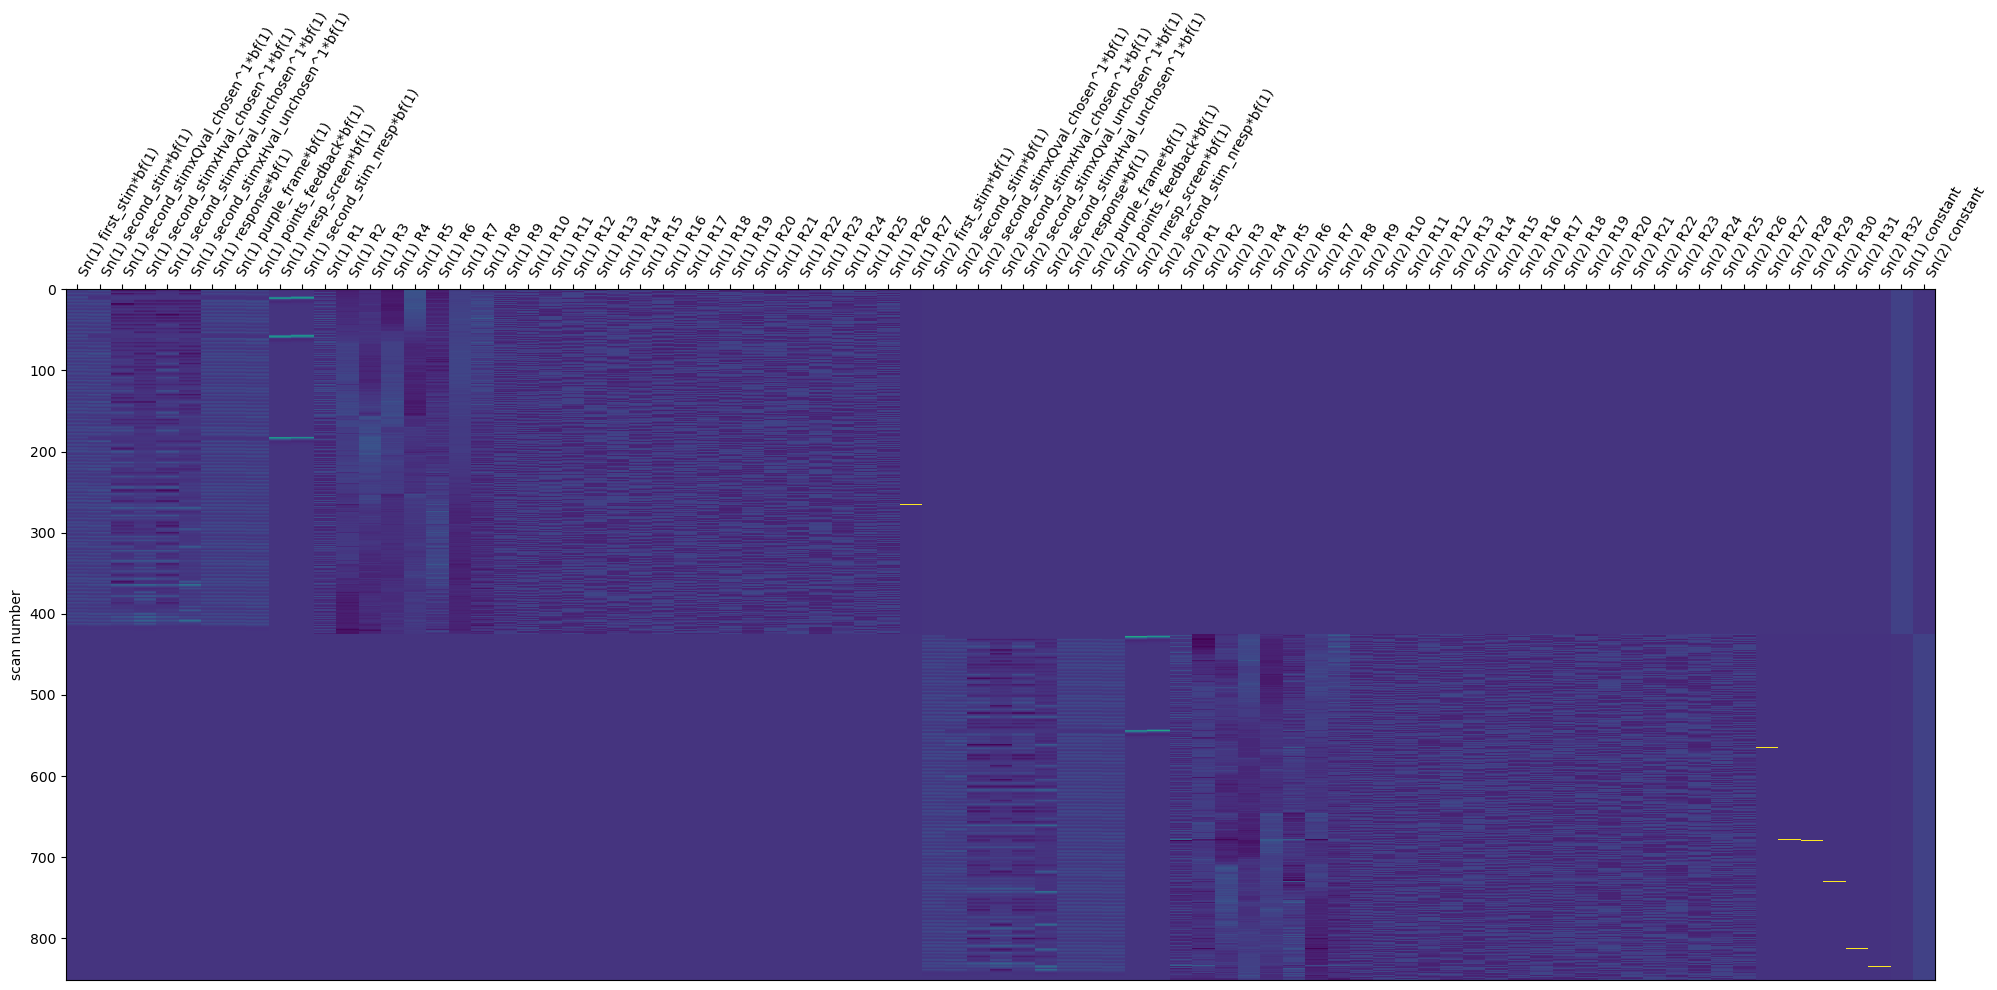

In [27]:
plot_design_matrix(dms['sub-01']['learning'])

In [75]:
def VIFs_summary_comb(DMs, phase, n_regs = 9):
    VIFs = []
    for _, subject in DMs.items():
        dm = subject[phase]
        if phase == 'learning':
            # First n_regs regressors for each session
            sess1_regs = [c for c in dm.columns if c.startswith('Sn(1)')][:n_regs]
            sess2_regs = [c for c in dm.columns if c.startswith('Sn(2)')][:n_regs]
            regressors = sess1_regs + sess2_regs
        else:
            regressors = dm.columns[:n_regs]

        VIFs.append(est_vifs(dm, regressors))
    
    subjects = list(DMs.keys())
    df_vifs = pd.DataFrame(VIFs, index=pd.Index(subjects, name='subject'))
    return df_vifs

In [130]:
VIFs = VIFs_summary_comb(dms, 'learning', 6)

In [154]:
VIFs_test = VIFs_summary_comb(dms, 'test', 6)

In [155]:
pm_VIFs=VIFs.filter(like='x', axis=1)

In [156]:
pm_VIFs.describe()

/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Sn(1) second_stimxQval_chosen^1*bf(1),Sn(1) second_stimxHval_chosen^1*bf(1),Sn(1) second_stimxQval_unchosen^1*bf(1),Sn(1) second_stimxHval_unchosen^1*bf(1),Sn(2) second_stimxQval_chosen^1*bf(1),Sn(2) second_stimxHval_chosen^1*bf(1),Sn(2) second_stimxQval_unchosen^1*bf(1),Sn(2) second_stimxHval_unchosen^1*bf(1)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.758612,2.334319,3.605808,1.807978,inf,2.685069,inf,2.466839
std,1.731596,0.297743,1.738632,0.412420,NaN,0.368004,NaN,0.426315
min,0.290867,1.737437,0.186024,0.998596,3.256398,1.736644,2.688074,1.681287
25%,2.586917,2.174659,2.530573,1.570734,5.619290,2.409395,5.642300,2.264169
50%,3.282003,2.291636,3.171610,1.721472,9.707223,2.655281,9.607561,2.450289
75%,4.503420,2.447280,3.891349,1.944075,21.225605,2.919978,21.401965,2.593845
max,11.121618,3.530159,11.299738,4.018223,inf,3.955412,inf,3.923721


In [161]:
# select rows where any PM VIF exceeds the threshold
high_pm_vifs = pm_VIFs[pm_VIFs.gt(100).any(axis=1)]
high_pm_vifs

,Sn(1) second_stimxQval_chosen^1*bf(1),Sn(1) second_stimxHval_chosen^1*bf(1),Sn(1) second_stimxQval_unchosen^1*bf(1),Sn(1) second_stimxHval_unchosen^1*bf(1),Sn(2) second_stimxQval_chosen^1*bf(1),Sn(2) second_stimxHval_chosen^1*bf(1),Sn(2) second_stimxQval_unchosen^1*bf(1),Sn(2) second_stimxHval_unchosen^1*bf(1)
subject,,,,,,,,
sub-20,6.527523,2.099197,6.245659,1.846755,4.895217e+13,2.785518,4.895217e+13,2.588563
sub-23,2.573920,2.016543,2.362302,1.459583,4.208972e+13,2.924364,4.208972e+13,2.445611
sub-47,7.129603,2.005154,6.341891,1.563745,2.614681e+06,2.934150,2.613467e+06,2.534033
sub-50,5.239725,1.867173,5.559209,1.976552,3.775451e+03,2.918767,3.415685e+03,2.609691
sub-71,11.121618,2.482410,11.299738,1.653752,inf,2.283814,inf,2.264267


# Rank deficiency

In [105]:
def check_rank(dm, tol=1e-10):
    X = dm.values
    rank = np.linalg.matrix_rank(X, tol=tol)
    return rank, X.shape[1]

In [119]:
# for subj, runs in dms.items():
#     for phase in ('learning', 'test'):
#         if phase not in runs:
#             continue
#         dm = runs[phase]
#         rank, n_cols = check_rank(dm)
#         if rank < n_cols:
#             print(f"Subject {subj} ({phase}) has rank deficiency: rank {rank} < n_cols {n_cols}")

In [188]:
good_dm = dms['sub-03']['learning']
bad_dm = dms['sub-23']['learning']

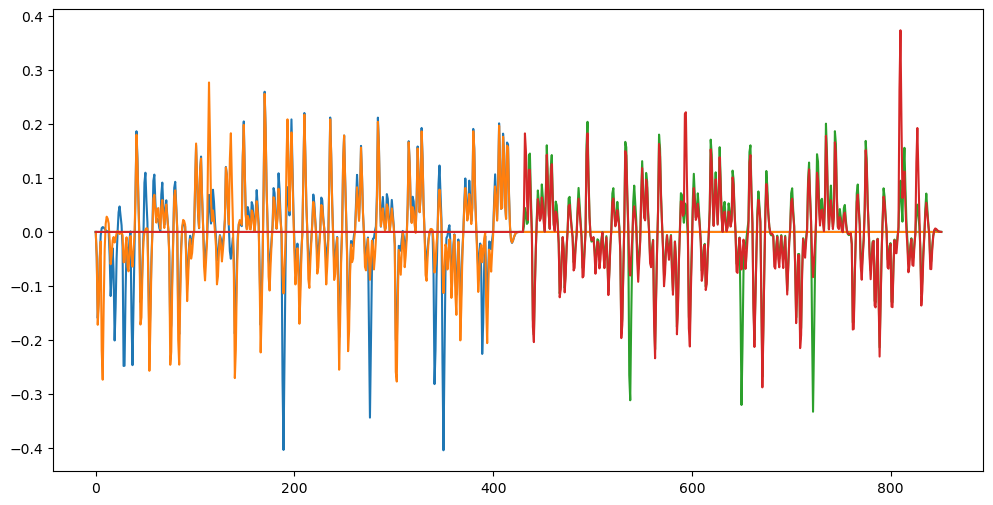

In [189]:
plt.figure(figsize=(12, 6))
plt.plot(good_dm['Sn(1) second_stimxQval_chosen^1*bf(1)'])
plt.plot(good_dm['Sn(1) second_stimxQval_unchosen^1*bf(1)'])
plt.plot(good_dm['Sn(2) second_stimxQval_chosen^1*bf(1)'])
plt.plot(good_dm['Sn(2) second_stimxQval_unchosen^1*bf(1)'])


In [191]:
for sub_id, sub in dms.items():
    dm = sub['learning']
    if np.allclose(dm['Sn(2) second_stimxQval_chosen^1*bf(1)'], dm['Sn(2) second_stimxQval_unchosen^1*bf(1)']):
        print("Found subject with identical regressors in Sn(2)")
        print(sub_id)

Found subject with identical regressors in Sn(2)
sub-20
Found subject with identical regressors in Sn(2)
sub-23
Found subject with identical regressors in Sn(2)
sub-71
